In [8]:
import os
import glob
import numpy as np
import matplotlib.pylab as plt
import scipy.signal

import spikeinterface.extractors as se
import spikeinterface.preprocessing as sp

#######################################################################
animal_ID = 'FNT098'
session_ID = '2024-03-11T11-24-46'

base_folder = r"W:\projects\FlexiVexi\behavioural_data"
session_folder = os.path.join(base_folder, animal_ID, session_ID)

#######################################################################

**Get spike sorting and raw recording**

In [3]:
# Path to Kilosort3 output files within session folder
kilosort_folder = os.path.join(session_folder, 'kilosort3_v3')

# Get output from spike sorting using Kilosort3, keeping only good units
sorting_KS = se.read_kilosort(folder_path=kilosort_folder,keep_good_only=True)
print(sorting_KS)

# Get path to Open-Ephys Record Node within session folder
matching_files = glob.glob(os.path.join(session_folder, '**', 'settings.xml'), recursive=True)
if matching_files:
    # Get the first matching file
    first_matching_file = matching_files[0]
  
    # Get the directory of the first matching file
    path_to_recording = os.path.dirname(first_matching_file)
else:
    print("No 'settings.xml' file found in the specified path.")
    
# Get recording from open ephys
recording = se.read_openephys(folder_path=path_to_recording, stream_name = 'Record Node 102#Neuropix-PXI-100.ProbeA')

KiloSortSortingExtractor: 199 units - 1 segments - 30.0kHz


**Get LFP**

In [4]:
recording_lfp = sp.bandpass_filter(recording, freq_min=1, freq_max=300)
recording_lfp = sp.resample(recording_lfp, 1000)
recording_mua = sp.resample(sp.rectify(recording), 1000)

**Plot Channel LFP timeseries by depth**

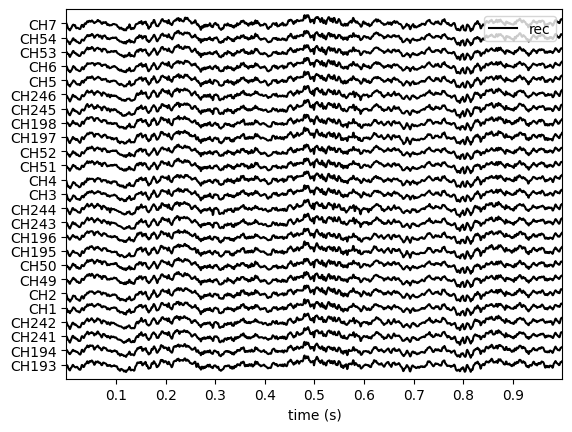

In [5]:
import spikeinterface.widgets as sw

# number of channels to plot
num_channels = 25

# Re-order recording such that channels are ordered by depth
recording_lfp_lex = sp.depth_order(recording_lfp, dimensions='y')

# Take first n channel IDs from recording_lfp_lex
channel_ids = recording_lfp_lex.get_channel_ids()[:num_channels]

# Plot channels by depth
sw.plot_traces(recording_lfp_lex, order_channel_by_depth=True, channel_ids=channel_ids, show_channel_ids=True)


In [10]:
f_raw, p_raw = scipy.signal.welch(recording_lfp_lex.get_traces(), fs=recording_lfp_lex.get_sampling_frequency(), )

# plot PSD
#plt.plot(f_raw, p_raw)
#plt.xlabel('Frequency')
#plt.ylabel('Power Spectral Density')
#plt.title('Plot LFP Power Spectral Density')
#plt.show()

MemoryError: Unable to allocate 74.6 GiB for an array with shape (384, 104247582) and data type int16